# Moran process

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Neutral Drift

In [2]:
def neutral_drift(N, i=1, seed=7):
    A=[i]
    B=[N-i]
    np.random.seed(seed)
    while (A[-1] != 0 and A[-1] != N):
        random = np.random.random()
        if random <= (A[-1]/N)*(1 - A[-1]/N):
            A.append(A[-1] + 1)
            B.append(B[-1] - 1)
        elif (random > (A[-1]/N)*(1 - A[-1]/N) and random <= 2*(A[-1]/N)*(1 - A[-1]/N)):
            A.append(A[-1] - 1)
            B.append(B[-1] + 1)
        else:
            A.append(A[-1])
            B.append(B[-1])
    return pd.DataFrame({'A':A, 'B':B})

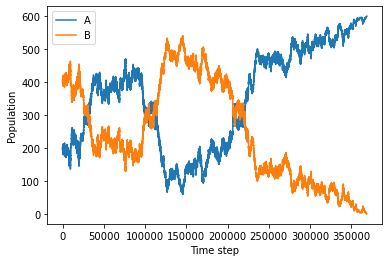

In [3]:
neutral_drift(N=600, i=200).plot()
plt.xlabel('Time step')
plt.ylabel('Population')
plt.show()

## Random Drift with Constant Selection

In [4]:
def constant_selection(N, i=1, r=1.01, seed=0):
    A=[i]
    B=[N-i]
    np.random.seed(seed)
    while (A[-1] != 0 and A[-1] != N):
        random = np.random.random()
        if random <= ((r*A[-1])/(r*A[-1] + N - A[-1]))*((N - A[-1])/N):
            A.append(A[-1] + 1)
            B.append(B[-1] - 1)
        elif (random > ((r*A[-1])/(r*A[-1] + N - A[-1]))*((N - A[-1])/N) and random <= ((r*A[-1])/(r*A[-1] + N - A[-1]))*((N - A[-1])/N) + ((N - A[-1])/(r*A[-1] + N - A[-1]))*(A[-1]/N)):
            A.append(A[-1] - 1)
            B.append(B[-1] + 1)
        else:
            A.append(A[-1])
            B.append(B[-1])
    return pd.DataFrame({'A':A, 'B':B})

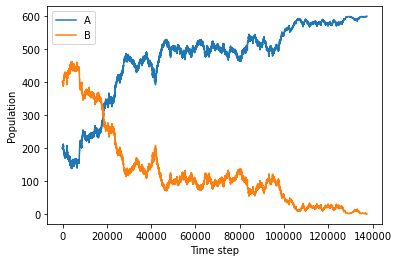

In [5]:
constant_selection(N=600, i=200).plot()
plt.xlabel('Time step')
plt.ylabel('Population')
plt.show()

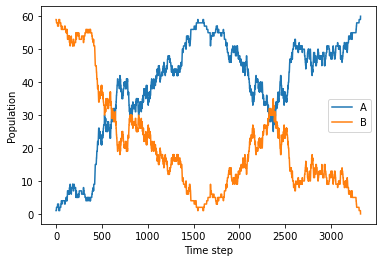

In [6]:
constant_selection(N=60, i=1, r=1.2, seed=1).plot()
plt.xlabel('Time step')
plt.ylabel('Population')
plt.show()

## Rate of Evolution

In [7]:
def mutation(N, u=0.001, r=1.2, seed=0, max_steps=100000):
    np.random.seed(seed)
    A = [0]
    B = [N]
    while B[-1] > 0:
        ran = np.random.random()
        if ran <= u :
            A.append(A[-1] + 1)
            B.append(B[-1] - 1)
        else:
            B.append(B[-1])
            A.append(A[-1])
        random = np.random.random()
        if random <= ((r*A[-1])/(r*A[-1] + N - A[-1]))*((N - A[-1])/N):
            A.append(A[-1] + 1)
            B.append(B[-1] - 1)
        elif (random > ((r*A[-1])/(r*A[-1] + N - A[-1]))*((N - A[-1])/N) and random <= ((r*A[-1])/(r*A[-1] + N - A[-1]))*((N - A[-1])/N) + ((N - A[-1])/(r*A[-1] + N - A[-1]))*(A[-1]/N)):
            A.append(A[-1] - 1)
            B.append(B[-1] + 1)
        else:
            A.append(A[-1])
            B.append(B[-1])
        if len(A) >= max_steps:
            break
    return pd.DataFrame({'A':A, 'B':B})

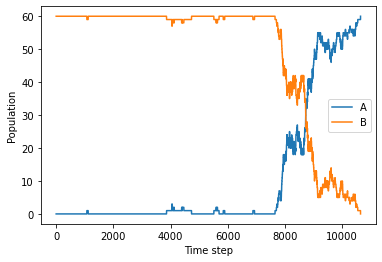

In [8]:
mutation(N=60).plot()
plt.xlabel('Time step')
plt.ylabel('Population')
plt.show()